# 問題1-2

In [14]:
class ScratchSVMClassifier:
    
    def __init__(self,n_iter,lr,lam_limit=0):
        self.n_iter = n_iter
        self.lr = lr
        self.lam_limit = lam_limit
        self.loss = np.zeros(n_iter)
        
            
    def fit(self,X,y,sample_weight = None):
        self.X = X
        self.y = y
        np.random.seed(1)
        self.lam = np.random.rand(X.shape[0])
        self.lam_grad_list = np.zeros((self.n_iter, X.shape[0]))
        self.lam_list = np.zeros((self.n_iter,X.shape[0]))
        
        for n in range(self.n_iter):
            #lamda_grad,loss = self.gradient_descent(X,y)
            lamda_grad,loss = self.super_gradient_descent(X,y)
            self.lam_list[n,:] = self.lam
            self.lam_grad_list[n,:] = lamda_grad
            self.loss[n] = loss
        #サポートベクトルの選定
        svec_mask = self.lam > self.lam_limit
        self.svec = X[svec_mask,:]
        self.sy = self.y[svec_mask]
        self.slam = self.lam[svec_mask]
        
        
        
        
    def predict(self,X):
        print(X.shape,'Xshape')
        print(self.svec.T.shape,'svecshape')
        print(np.dot(X,self.svec.T).shape,'dotshape')
        score = np.sum(self.slam*\
                       self.sy * np.dot(X,self.svec.T),axis=1)
        print('np.dot(X,self.svec.T)',np.dot(X,self.svec.T))
        print('sy * np.dot',self.sy * np.dot(X,self.svec.T))
        print('score',score)
        return np.where(score > 0, 1, -1 )
        #shape (N,1) = sum((1,N) * (1,N) * (N, D)dot(D,svecN),axis=1)
        #self.svec = (N,D)
        #X = (N,D)
        
        #lamdaは学習の結果自然と0になって行くものなので、
        #裏を返せば0より大きいものは全てサポートベクトルである。
        #この本来サポートベクトルであるものから、恣意的に閾値を設定し
        #てlamdaを選出するというのは合理的ではない。
        #またこの場合、スライドの計算式とも矛盾か生じる。
        #(スライドの式はサポートベクトルに対応するlamdaが0である
        #ことを前提に式変形を行った結果、N=サポートベクトルの数
        #となっている。つまり恣意的に選んだ場合、本来サポート
        #ベクトルだった分のものの数だけNが減ってしまう)
        #従って0より大きいものを全てサポートベクトルとして扱う
        
        #スライドの仮定関数のf(x)の計算結果は、np.dot(w.T,X)である
        #この値は0以上、0以下となることによって、y(w.T,X)>=0とするため
        #に、np.dot(w.T,X)で求まった符号と同じラベルを返す。
        #同じ符号どうしの掛け算は必ず正となるからである
        
    def gradient_descent(self,X,y):
        #lambdaの値をそれぞれ算出
        lamda_grad = np.zeros_like(self.lam)
        for i in range(X.shape[0]):
            c1 = y[i] * np.sum(self.lam * y *  np.dot(X[i],X.T))
            #print(np.dot(X,X[j]),'np.dot')
            #print(self.lam,'self.lam')
            #print(y,'y')
            #print(c1,'c1')
            #c2 = np.sum(self.lam * y * y[j])
            #print(c2,'c2')
            lamda_grad[i] = 1 - c1# - c2
            self.lam[i] += self.lr * lamda_grad[i]
            if self.lam[i] <0:
                self.lam[i] = 0
            
        #lambda_y = self.lam * y#(N,)のベクトルを想定
        #print(lamda_grad,'lamda_grad')
        
        loss = self.ragranju_loss(X,y)
        return lamda_grad,loss
    
    def super_gradient_descent(self, X, y):
        
        lamda_grad = np.zeros_like(self.lam)
        c1 = np.sum(self.lam * np.dot(y.reshape(-1,1),
                                      y.reshape(1,-1)) * self.kernel(X),axis=1)
        lamda_grad = 1 - c1# - c2
        self.lam += self.lr * lamda_grad
        lam_zero_mask = self.lam < 0
        self.lam[lam_zero_mask] = 0
            
        #lambda_y = self.lam * y#(N,)のベクトルを想定
        #print(lamda_grad,'lamda_grad')
        
        loss = self.ragranju_loss(X,y)
        return lamda_grad,loss
        
        
        #下記は置き換えなので別段必要はない。
        #self.thita = np.dot(lambda_y,X)
        #self.bias = 
        #thitaは、(D,)のベクトルとなる。このベクトルとX(N,D)をかけと
        #(N,)になる。これと教師ラベルyと引き算すると(N,)になり、
        #これの平均をとるとスカラー値、つまり切片となる
    
    def accuracy(self,X,y):
        y_pred = self.predict(X)
        return np.sum(y_pred == y)/X.shape[0]
                        
    def ragranju_loss(self,X,y):
        #print(X.shape,'X')
        #print(y.shape,'y')
        #print(self.lam.shape,'lam')
        w = np.sum(self.lam.reshape(-1,1) *\
                   y.reshape(-1,1) * X,axis=0)
        #print('np.dot(w,X.T)', np.dot(w,X.T).shape)
        #print('y',y.shape)
        #print('lam', self.lam.shape)
        loss = np.sum(w**2)/2 - \
        np.sum(self.lam * (y * np.dot(w,X.T) - 1))
        return loss
    
    def kernel(self,X):
        return np.dot(X,X.T)
    
    def maltiple_kernel(self,X,gamma, theta,d):
        return gamma * (self.kernel(X) + theta)**d
        
        

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
iris_data = load_iris()
data = iris_data['data']
y_all = iris_data['target']
y_mask = y_all != 2
y = y_all[y_mask]
print(type(data))
X = data[y_mask,0:2]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,
                                                 random_state=0)

<class 'numpy.ndarray'>


In [3]:
zero_mask = y_train == 0
y_train[zero_mask] = -1
print(y_train)

[ 1 -1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1 -1 -1  1 -1 -1  1
 -1 -1  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1
 -1 -1 -1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1
 -1  1 -1]


In [4]:
n_iter = 100000
lr = 0.00001
svc = ScratchSVMClassifier(n_iter = n_iter, lr=lr)
svc.fit(X_train,y_train)
svc.predict(X_train)


(75, 2) Xshape
(2, 31) svecshape
(75, 31) dotshape
np.dot(X,self.svec.T) [[40.02 44.39 41.24 ... 44.72 36.61 37.68]
 [36.56 39.7  37.56 ... 39.86 32.66 34.2 ]
 [39.7  43.81 40.88 ... 44.1  36.11 37.32]
 ...
 [34.2  37.32 35.16 ... 37.5  30.72 32.04]
 [36.5  40.54 37.62 ... 40.85 33.44 34.38]
 [34.38 37.33 35.32 ... 37.48 30.71 32.16]]
sy * np.dot [[-40.02  44.39 -41.24 ...  44.72  36.61 -37.68]
 [-36.56  39.7  -37.56 ...  39.86  32.66 -34.2 ]
 [-39.7   43.81 -40.88 ...  44.1   36.11 -37.32]
 ...
 [-34.2   37.32 -35.16 ...  37.5   30.72 -32.04]
 [-36.5   40.54 -37.62 ...  40.85  33.44 -34.38]
 [-34.38  37.33 -35.32 ...  37.48  30.71 -32.16]]
score [ 1.60734103 -1.23250084  0.88120091 -2.58343256  2.03797677  2.56426691
 -0.96793224  0.61663231 -0.70336363  1.99849981 -1.69407236 -0.5739264
 -0.87227784  0.21977941  1.50883957 -1.16778222  1.97325815  0.97685531
 -1.198718   -1.85729244  1.30614253 -1.2353479  -1.82635666  1.70584249
 -1.4632866  -1.23250084  1.60734103  1.44127389  0.84

array([ 1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
        1, -1,  1, -1, -1,  1, -1])

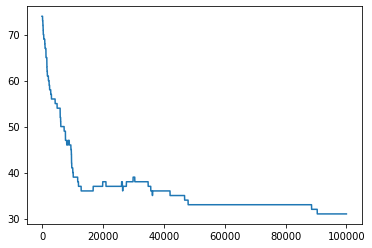

In [7]:
import matplotlib.pyplot as plt
lam_process = np.sum(svc.lam_list > 0,axis=1)
plt.plot(lam_process)
plt.show()

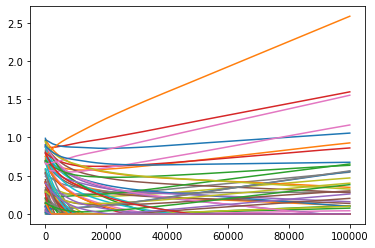

In [8]:
for i in range(svc.lam_list.shape[1]):
    plt.plot(np.arange(1,lam_process.shape[0]+1), svc.lam_list[:,i])

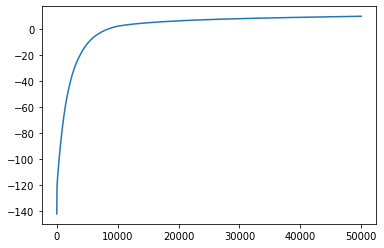

In [372]:
plt.plot(np.arange(1,len(svc.loss) + 1), svc.loss)

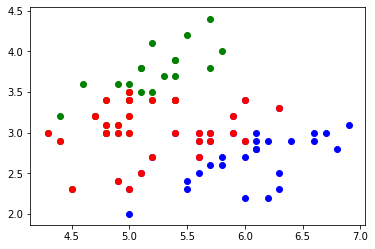

In [371]:
y1 = y_train == 1
yminus1 = y_train == -1

plt.scatter(X_train[y1,0],X_train[y1,1],color='blue')
plt.scatter(X_train[yminus1,0],X_train[yminus1,1],color='green')
plt.scatter(svc.svec[:,0],svc.svec[:,1],color='red')

In [340]:
svc.predict(X_train)

(75, 2) Xshape
(2, 29) svecshape
(75, 29) dotshape
np.dot(X,self.svec.T) [[44.39 41.24 43.17 ... 44.72 36.61 37.68]
 [39.7  37.56 38.7  ... 39.86 32.66 34.2 ]
 [43.81 40.88 42.63 ... 44.1  36.11 37.32]
 ...
 [37.32 35.16 36.36 ... 37.5  30.72 32.04]
 [40.54 37.62 39.42 ... 40.85 33.44 34.38]
 [37.33 35.32 36.39 ... 37.48 30.71 32.16]]
sy * np.dot [[ 44.39 -41.24  43.17 ...  44.72  36.61 -37.68]
 [ 39.7  -37.56  38.7  ...  39.86  32.66 -34.2 ]
 [ 43.81 -40.88  42.63 ...  44.1   36.11 -37.32]
 ...
 [ 37.32 -35.16  36.36 ...  37.5   30.72 -32.04]
 [ 40.54 -37.62  39.42 ...  40.85  33.44 -34.38]
 [ 37.33 -35.32  36.39 ...  37.48  30.71 -32.16]]
score [ 1.68611822 -1.29142688  0.92478017 -2.70775434  2.13768634  2.68941911
 -1.0140145   0.64736779 -0.73660212  2.09605281 -1.77535255 -0.60098792
 -0.91384984  0.23124922  1.58286158 -1.22361978  2.06987924  1.02494483
 -1.25597733 -1.94641629  1.3701643  -1.29451887 -1.91405874  1.78937487
 -1.53338971 -1.29142688  1.68611822  1.51196249  0.8

array([ 1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
        1, -1,  1, -1, -1,  1, -1])

In [349]:
svc.svec.shape

(26, 2)

In [325]:
svc.sy

array([-1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1])

# 問題3 指標値の算出

In [10]:
acc = svc.accuracy(X_train,y_train)
print('Accuracy: {:.3f}%'.format(acc*100))

(75, 2) Xshape
(2, 31) svecshape
(75, 31) dotshape
np.dot(X,self.svec.T) [[40.02 44.39 41.24 ... 44.72 36.61 37.68]
 [36.56 39.7  37.56 ... 39.86 32.66 34.2 ]
 [39.7  43.81 40.88 ... 44.1  36.11 37.32]
 ...
 [34.2  37.32 35.16 ... 37.5  30.72 32.04]
 [36.5  40.54 37.62 ... 40.85 33.44 34.38]
 [34.38 37.33 35.32 ... 37.48 30.71 32.16]]
sy * np.dot [[-40.02  44.39 -41.24 ...  44.72  36.61 -37.68]
 [-36.56  39.7  -37.56 ...  39.86  32.66 -34.2 ]
 [-39.7   43.81 -40.88 ...  44.1   36.11 -37.32]
 ...
 [-34.2   37.32 -35.16 ...  37.5   30.72 -32.04]
 [-36.5   40.54 -37.62 ...  40.85  33.44 -34.38]
 [-34.38  37.33 -35.32 ...  37.48  30.71 -32.16]]
score [ 1.60734103 -1.23250084  0.88120091 -2.58343256  2.03797677  2.56426691
 -0.96793224  0.61663231 -0.70336363  1.99849981 -1.69407236 -0.5739264
 -0.87227784  0.21977941  1.50883957 -1.16778222  1.97325815  0.97685531
 -1.198718   -1.85729244  1.30614253 -1.2353479  -1.82635666  1.70584249
 -1.4632866  -1.23250084  1.60734103  1.44127389  0.84

In [342]:
print(svc.lam_grad_list[149999])

[-0.68611656 -0.29142558  0.07522073 -1.70771931 -1.13772006 -1.68945005
 -0.01398273  0.3525952   0.2635803  -1.09611458 -0.77527997  0.39907868
  0.08609321  0.76884569 -0.5830811  -0.22343799 -1.07021622 -0.02519859
 -0.25570608 -0.9461288  -0.37040182 -0.29429225 -0.91370274 -0.78975834
 -0.53303178 -0.29107201 -0.68662626 -0.51244707  0.11018313 -0.82222764
  0.55858687 -0.61597163 -1.06440847 -0.9456148  -0.23529838  0.19312935
 -0.60058543 -1.99978346 -0.39409818 -0.63288771  0.24561078  1.67719938
  0.4911645   0.26377366 -0.89602328 -2.27686793 -0.56859148 -0.44443556
  0.29599932 -1.12041302 -1.12041302 -0.63960237 -0.20235917 -2.17350468
 -0.28816399  0.24922038  0.67666075  0.5377245  -1.03421087 -1.65684288
 -0.46268487 -0.86006446  0.15687922 -0.75367953  0.32050196 -1.5337363
  0.90450319 -1.73981043 -0.30573087 -1.33004931  0.0103852  -0.53325201
  0.39913997 -0.71847578 -0.22361978]


In [351]:
np.sort(svc.lam)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01936132,
       0.02740766, 0.05355541, 0.15158018, 0.19159489, 0.21066289,
       0.26205093, 0.45290739, 0.49457858, 0.58213494, 0.68679283,
       0.69848458, 0.73433164, 0.78199321, 0.79244517, 0.89862626,
       1.10102064, 1.11506568, 1.12674043, 1.14532933, 1.30295877,
       1.32818964, 1.84039108, 2.36601144, 2.45826827, 4.26319

In [327]:
#lamdaの数 15万＝29
#lamdaの数　１０万回＝31
#1万回=41
np.sum(svc.lam>0)

31

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_grads(array_list):
    for i in range(array_list.shape[1]):
        plt.plot(np.arange(1,array_list.shape[0]+1),array_list[:,i],
                label=i)
    plt.legend()

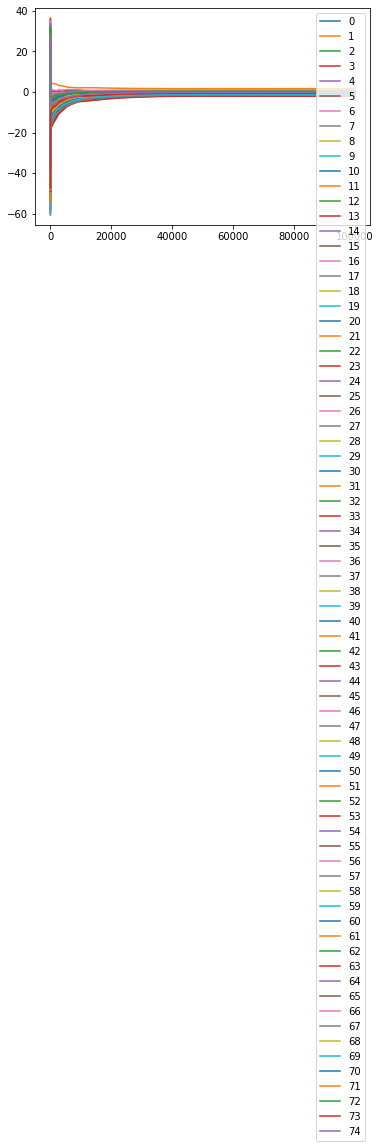

In [362]:
plot_grads(svc.lam_grad_list)

# SVMの仕組み

y(w.T, x)が識別境界からサポートベクトルを通る直線の距離に相当し、この距離は識別境界の反対側にあるサポートベクトルとの距離と同じにする。
例えば、それぞれ反対側にあるサポートベクトルをx0,x1とすると、x0から識別境界までの距離が0.3,x1から識別境界までの距離が0.3であったりする。これについて、wに対してkで定数倍することで、無理矢理、この距離を1にしている。これによって、f(x) = sign(w.T,x)は、サポートベクトルのみを取ってくるようにw=np.sum(lambda*yi * xi)のところを設定し、これをf(x)の式に代入すると、lambdan * yn * x.T * sn=1になる。これをサポートベクトルの数分足し合わせると、例えばサポートベクトルの数が2だとすると、=2になり、、、、w＝サンプル数分のものを持ってきているのにそこからなぜサポートベクトルのもののみを抽出する式が成り立つのか。
→サンプル数が100個とか、本来あったものを、サポートベクトルの個数、つまりサンプルが2個しかなかったことにして（つまり他のsampleを全て無視して）計算を行っている。よってサポートベクトルのもののみを抽出する式が成り立つ。また、サポートベクトルを使った場合のみy(w.T,x)が＝１になる。

サポートベクトルでない場合、そもそもlambda=0になる。だから、どっちにしろ、サポートベクトルに対応するもののみのsumの式になる。


In [210]:
lamda_j += 1 - np.sum(lamda_j * yj * 
                      yi(vec) x.Tshape(N,D) xj shape(D,1))

SyntaxError: invalid syntax (<ipython-input-210-7616768826f7>, line 2)

In [ ]:
X_train.shape

In [ ]:
a = np.array([2,2])
b = np.array([2,2])
print(np.sum(a = b))

In [ ]:
vector = np.array([2,2,2,3])
matrix = np.array([[2,3],[2,3],[2,3],[2,3]])
matrix2 = np.array([[2],[2],[2],[2]])
print(vector.shape)#ベクトル
print(matrix.shape)#行列

print(np.dot(vector,matrix).shape)
#print(vector * matrix)
#ベクトルは横ベクトルなので、vectorの4とmatrixの2が対応していない
#のでエラーが発生する
print(matrix2.shape)
#matrix2を定義し、列を1としてベクトルに合わせると、
#縦がmatrix2の行、横が横ベクトルの列に無理矢理にするように
#ブロードキャストしてしまう。
print(matrix2 * vector)



In [223]:
lamda = np.array([2,2,5,5])
X = np.ones((4,2))
print(X.shape)

sikiti = 3
lamda_index = lamda > sikiti
lamda_index
print(X[lamda_index,:])



(4, 2)
[[1. 1.]
 [1. 1.]]


# 問題4 決定領域の可視化

In [224]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(Z,'Zの値')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        print(cl,'cl')
        print(idx,'idx')
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    plt.legend()

(50820, 2) Xshape
(2, 31) svecshape
(50820, 31) dotshape
np.dot(X,self.svec.T) [[19.9   22.47  20.56  ... 22.7   18.57  18.84 ]
 [20.    22.588 20.664 ... 22.82  18.668 18.936]
 [20.1   22.706 20.768 ... 22.94  18.766 19.032]
 ...
 [57.592 62.514 59.164 ... 62.762 51.426 53.868]
 [57.692 62.632 59.268 ... 62.882 51.524 53.964]
 [57.792 62.75  59.372 ... 63.002 51.622 54.06 ]]
sy * np.dot [[-19.9    22.47  -20.56  ...  22.7    18.57  -18.84 ]
 [-20.     22.588 -20.664 ...  22.82   18.668 -18.936]
 [-20.1    22.706 -20.768 ...  22.94   18.766 -19.032]
 ...
 [-57.592  62.514 -59.164 ...  62.762  51.426 -53.868]
 [-57.692  62.632 -59.268 ...  62.882  51.524 -53.964]
 [-57.792  62.75  -59.372 ...  63.002  51.622 -54.06 ]]
score [ 2.05734247  2.08379787  2.11025328 ... -2.01898662 -1.99253122
 -1.96607581]
[ 1  1  1 ... -1 -1 -1] Zの値
-1 cl
0 idx
1 cl
1 idx


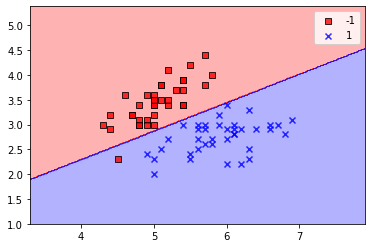

In [363]:
plot_decision_regions(X_train,y_train,svc)

# 問題5 時間の計測

In [11]:
import time
n_iter = 100000
lr = 0.00001
svc = ScratchSVMClassifier(n_iter = n_iter, lr=lr)
t0 = time.time()
svc.fit(X_train,y_train)
t1 = time.time()
print('time : {}s'.format(t1-t0))

time : 11.878136157989502s


上記タイムは勾配計算を高速化した結果になります。

# 問題6 ロジスティック回帰とSVM 

ロジスティック回帰は出力された連続値に対して閾値を設けて分類を行う一方で、SVMは直接分類を行う。